# Clusterização da Grande Base

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings('ignore') #ou warnings.filterwarnings(action='once')

In [27]:
#uri = 'https://raw.githubusercontent.com/ieee-uerj/capes-data-analysis/main/data/Grande%20Base.csv'
uri = "../"
df_inicial = pd.read_csv(uri, encoding='latin-1')

## Análises Gerais

In [28]:
df = df_inicial.copy()
df.head()

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,SG_ENTIDADE_ENSINO,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,SG_UF_PROGRAMA,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO AUXÃÂLIO FINANCEIRO,SEM AUXÃÂLIO,PÃÂBLICA_OU_PRIVADA,QTD_FINANCIADORES
0,10001018002P1,2013,9,3,25,10,15,25,0,16,9,0,25,0,23,2,12,8,2,3,0,2,3.0,2.0,TESE,0.0,NaN,0,21,15,10,25,0,25,1967.560000,UNIR,29,48,77,0,13.440000,3.080000,77,0.376623,1.889019,40.761905,NaN,FEDERAL,1981.000000,NORTE,RO,3,0,1,19,17.0,2.0,16,1.0,15.0,0.0,1,3
1,10001018002P1,2014,9,3,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0,2,3.0,2.0,TESE,1.0,80.0,0,13,14,8,22,0,22,1966.954545,UNIR,26,43,68,1,16.320817,3.136364,69,0.376812,2.193154,31.461538,3.636364,FEDERAL,1983.275362,NORTE,RO,3,3255,1,26,23.0,3.0,20,1.0,19.0,0.0,1,3
2,10001018002P1,2015,9,3,22,8,14,22,0,15,5,2,22,0,20,2,12,9,0,1,0,2,3.0,2.0,TESE,0.0,NaN,0,20,14,8,22,0,22,1971.136364,UNIR,33,57,88,2,13.174747,4.090909,90,0.366667,3.082192,29.200000,NaN,FEDERAL,1984.311111,NORTE,RO,3,6689,1,26,23.0,3.0,19,1.0,18.0,0.0,1,3
3,10001018002P1,2016,9,3,20,7,13,20,0,14,4,2,20,0,18,2,11,8,0,1,0,2,3.0,2.0,TESE,0.0,NaN,0,18,13,7,20,0,20,1972.200000,UNIR,28,53,80,1,14.293827,4.050000,81,0.345679,2.685083,30.166667,NaN,FEDERAL,1986.493827,NORTE,RO,3,10272,1,40,35.0,5.0,32,2.0,30.0,0.0,1,4
4,10001018002P1,2017,9,4,22,8,14,22,0,16,4,2,22,0,20,2,12,9,0,1,0,2,4.0,2.0,TESE,1.0,NaN,0,21,14,8,22,0,22,1973.727273,UNIR,43,64,106,1,13.852167,4.863636,107,0.401869,3.763819,28.428571,NaN,FEDERAL,1987.579439,NORTE,RO,4,14025,1,68,61.0,7.0,58,6.0,52.0,0.0,1,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20250 entries, 0 to 20249
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CD_PROGRAMA_IES              20250 non-null  object 
 1   AN_BASE                      20250 non-null  int64  
 2   CD_AREA_AVALIACAO            20250 non-null  int64  
 3   CONCEITO_PROGRAMA            20250 non-null  int64  
 4   IB_Total_docentes            20250 non-null  int64  
 5   IB_Mulheres                  20250 non-null  int64  
 6   IB_Homens                    20250 non-null  int64  
 7   IB_Brasileiros               20250 non-null  int64  
 8   IB_Estrangeiros              20250 non-null  int64  
 9   IB_QTDE_Regime_Parcial       20250 non-null  int64  
 10  IB_QTDE_Regime_Integral      20250 non-null  int64  
 11  IB_QTDE_Regime_Exclusivo     20250 non-null  int64  
 12  IB_QTDE_Prof_Doutor          20250 non-null  int64  
 13  IB_QTDE_Prof_Nao

## Analisando a variável alvo

In [6]:
df[df['CONCEITO_PROGRAMA'] != 7].describe()

,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO AUXÃÂLIO FINANCEIRO,SEM AUXÃÂLIO,PÃÂBLICA_OU_PRIVADA,QTD_FINANCIADORES
count,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.00000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,18006.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19322.000000,19322.000000,18006.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000,19323.00000,19323.000000,19323.000000,19323.000000,19323.000000,19323.000000
mean,2015.663820,26.376908,4.025048,23.121203,9.762511,13.358692,22.502924,0.618279,1.991720,15.841174,5.288309,22.929411,0.191792,20.11463,3.006572,1.191068,18.090928,3.295244,0.375822,0.168038,1.583709,4.028722,2.678259,0.816540,121.571490,0.329090,20.753092,13.358692,9.762511,22.502924,0.618279,23.121203,1966.213520,40.964602,48.560834,88.254981,1.270455,16.671271,3.925645,89.525436,0.446172,2.909351,30.415036,6.316956,1982.884791,4.025048,11125.426280,0.878953,49.474875,45.363039,4.111836,36.37815,17.950215,18.362728,0.065207,0.824458,4.070020
std,1.696977,14.539649,0.943818,28.832411,11.749457,20.111238,28.210965,1.304813,5.753505,16.571494,16.216526,27.444860,2.132807,27.06555,3.811046,2.513503,27.248793,6.754982,1.157076,0.586542,0.492956,0.941792,5.562002,0.387053,47.460301,1.636934,21.630727,20.111238,11.749457,28.210965,1.304813,28.832411,5.066903,68.855337,48.017193,101.856247,3.370173,4.661223,1.906974,102.582031,0.191085,3.486417,6.834050,3.308457,4.246900,0.943818,6340.483527,0.326191,47.740197,43.178553,8.039853,40.47501,24.884347,23.513545,0.804894,0.380440,2.886264
min,2013.000000,1.000000,1.000000,5.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000,5.000000,1944.750000,0.000000,0.000000,1.000000,0.000000,-6.206960,0.090909,1.000000,0.000000,0.027778,1.142857,0.032258,1965.457143,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2014.000000,13.000000,3.000000,15.000000,5.000000,8.000000,15.000000,0.000000,0.000000,10.000000,0.000000,15.000000,0.000000,13.00000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,89.094498,0.000000,11.000000,8.000000,5.000000,15.000000,0.000000,15.000000,1962.714286,17.000000,23.000000,46.000000,0.000000,13.810138,2.588235,46.000000,0.308434,1.687056,25.174185,4.000000,1980.111111,3.000000,5685.500000,1.000000,23.000000,21.000000,0.000000,12.00000,3.000000,4.000000,0.000000,1.000000,2.000

In [7]:
df[df['CONCEITO_PROGRAMA'] == 7].describe()

,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO AUXÃÂLIO FINANCEIRO,SEM AUXÃÂLIO,PÃÂBLICA_OU_PRIVADA,QTD_FINANCIADORES
count,927.000000,927.000000,927.0,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.0,927.000000,927.000000,897.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,897.000000,927.000000,927.0,927.000000,927.0,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000
mean,2015.693635,18.759439,7.0,39.276160,14.361381,24.913700,37.447681,1.828479,2.757282,26.450917,10.067961,39.007551,0.268608,30.357066,8.919094,1.852211,33.420712,2.391586,1.180151,0.431499,1.995685,7.0,1.992449,0.828479,135.093656,3.196332,38.716289,24.913700,14.362460,37.447681,1.828479,39.276160,1963.127205,99.556634,86.203883,178.485437,7.275081,21.895922,5.117266,185.760518,0.496697,4.901905,38.578191,4.324596,1985.023127,7.0,11371.856526,1.0,92.555556,87.668824,4.886731,97.910464,50.221143,47.649407,0.039914,0.937433,5.153182
std,1.734852,13.959574,0.0,21.294888,11.019418,17.185467,19.974963,2.835240,5.564892,19.257982,17.676256,21.156696,0.673565,17.657187,7.838194,3.053298,20.333396,6.226542,2.772691,3.673118,0.065582,0.0,0.086616,0.377167,45.517772,6.552353,20.620095,17.185467,11.019628,19.974963,2.835240,21.294888,4.088359,94.658319,49.335788,113.925137,11.923390,3.603499,2.492715,118.024418,0.189188,3.349866,4.743634,2.414538,3.232215,0.0,6427.583970,0.0,70.709906,68.129857,13.227740,81.532325,53.471553,45.273694,0.253535,0.242314,4.070418
min,2013.000000,1.000000,7.0,11.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.0,1.000000,0.000000,35.000000,0.000000,5.000000,0.000000,0.000000,9.000000,0.000000,11.000000,1945.176471,11.000000,11.000000,38.000000,0.000000,10.378205,1.441176,42.000000,0.119266,0.945295,23.848214,0.857143,1973.768212,7.0,671.000000,1.0,6.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2014.000000,8.000000,7.0,24.000000,7.000000,14.000000,23.000000,0.000000,0.000000,14.000000,0.000000,24.000000,0.000000,18.000000,3.000000,0.000000,20.000000,0.000000,0.000000,0.000000,2.000000,7.0,2.000000,1.000000,105.545455,0.000000,25.000000,14.000000,7.000000,23.000000,0.000000,24.000000,1960.456797,45.000000,52.000000,107.000000,1.000000,19.431888,3.468864,111.000000,0.350006,2.926401,35.330745,2.497442,1983.086091,7.0,5205.500000,1.0,41.500000,40.000000,0.000000,42.500000,12.500000,16.000000,0.000000,1.000000,3.000000
50%,2016.000000,15.000000,7.0,34.000000,12.000000,20.000000,32.000000,1.000000,1.000000,23.000000,2.000000,34.000000,0.000000,26.000000,7.000000,1.000000,29.000000,0.000000,0.0

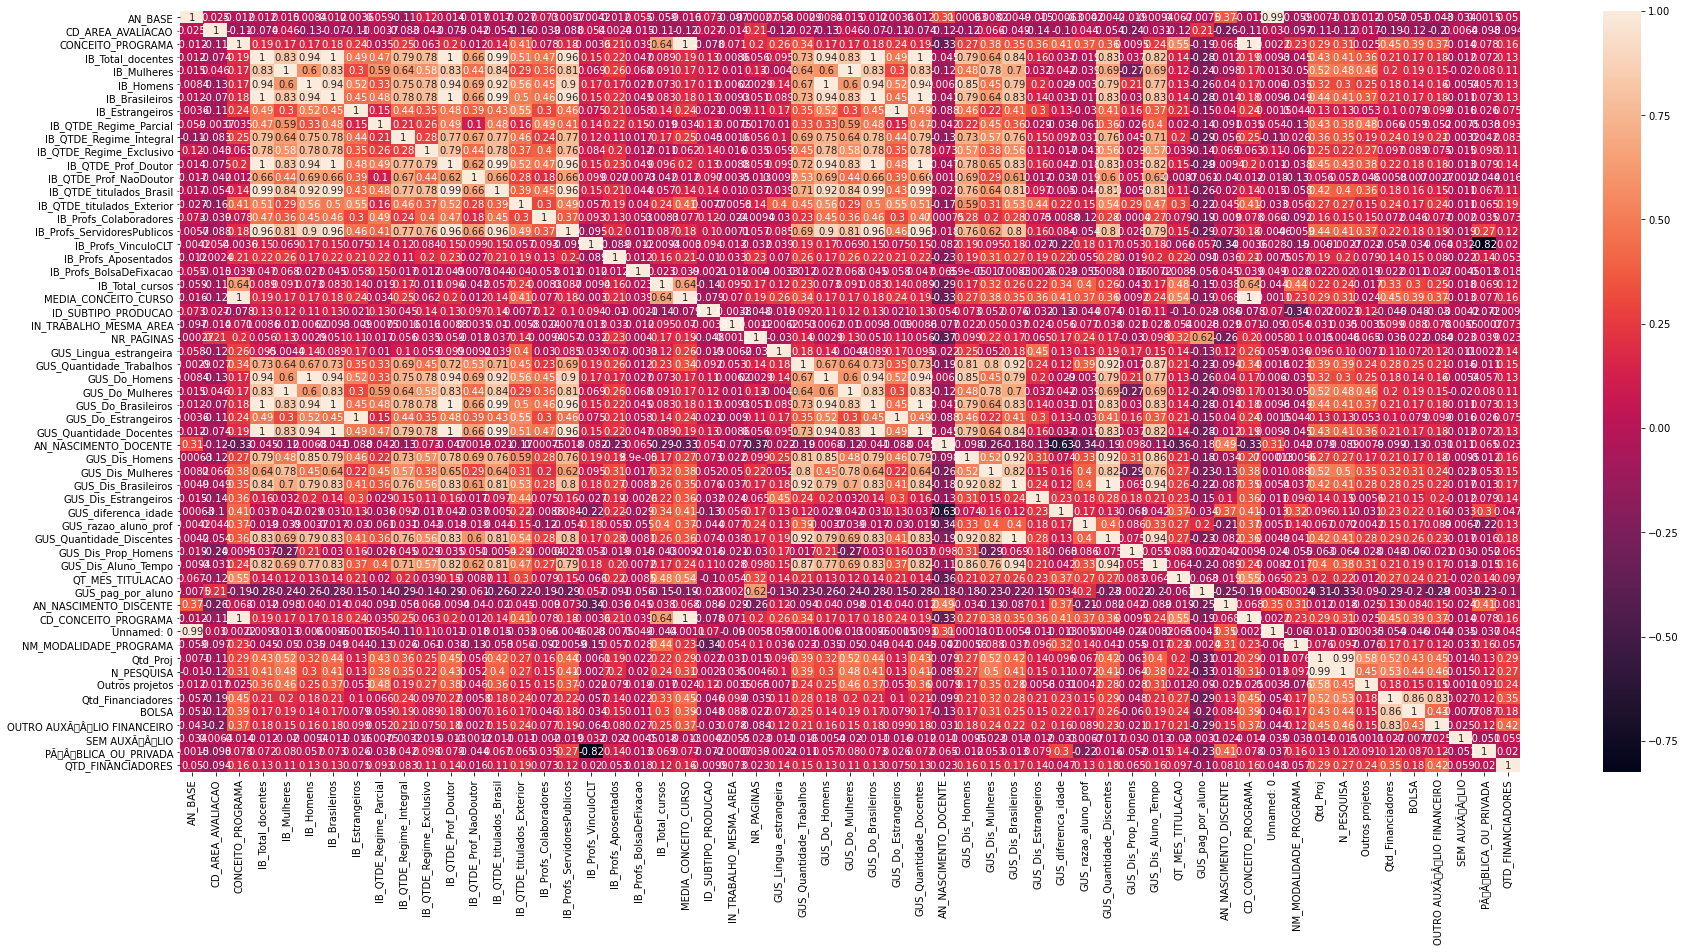

In [8]:
plt.figure(figsize = (30,14))
ax = sns.heatmap(df.corr(), annot = True)
ax = ax

In [9]:
conceito_corr = df.corr()['CONCEITO_PROGRAMA'].to_frame().reset_index()
conceito_corr = conceito_corr[conceito_corr['CONCEITO_PROGRAMA'] < 0.9].sort_values(by = 'CONCEITO_PROGRAMA', ascending = False)

In [13]:
conceito_corr.head(10)

,index,CONCEITO_PROGRAMA
20,IB_Total_cursos,0.640909
42,QT_MES_TITULACAO,0.545868
51,Qtd_Financiadores,0.451008
37,GUS_diferenca_idade,0.410797
14,IB_QTDE_titulados_Exterior,0.407857
52,BOLSA,0.390699
34,GUS_Dis_Mulheres,0.379735
53,OUTRO AUXÃÂLIO FINANCEIRO,0.371030
38,GUS_razao_aluno_prof,0.368930
36,GUS_Dis_Estrangeiros,0.359165


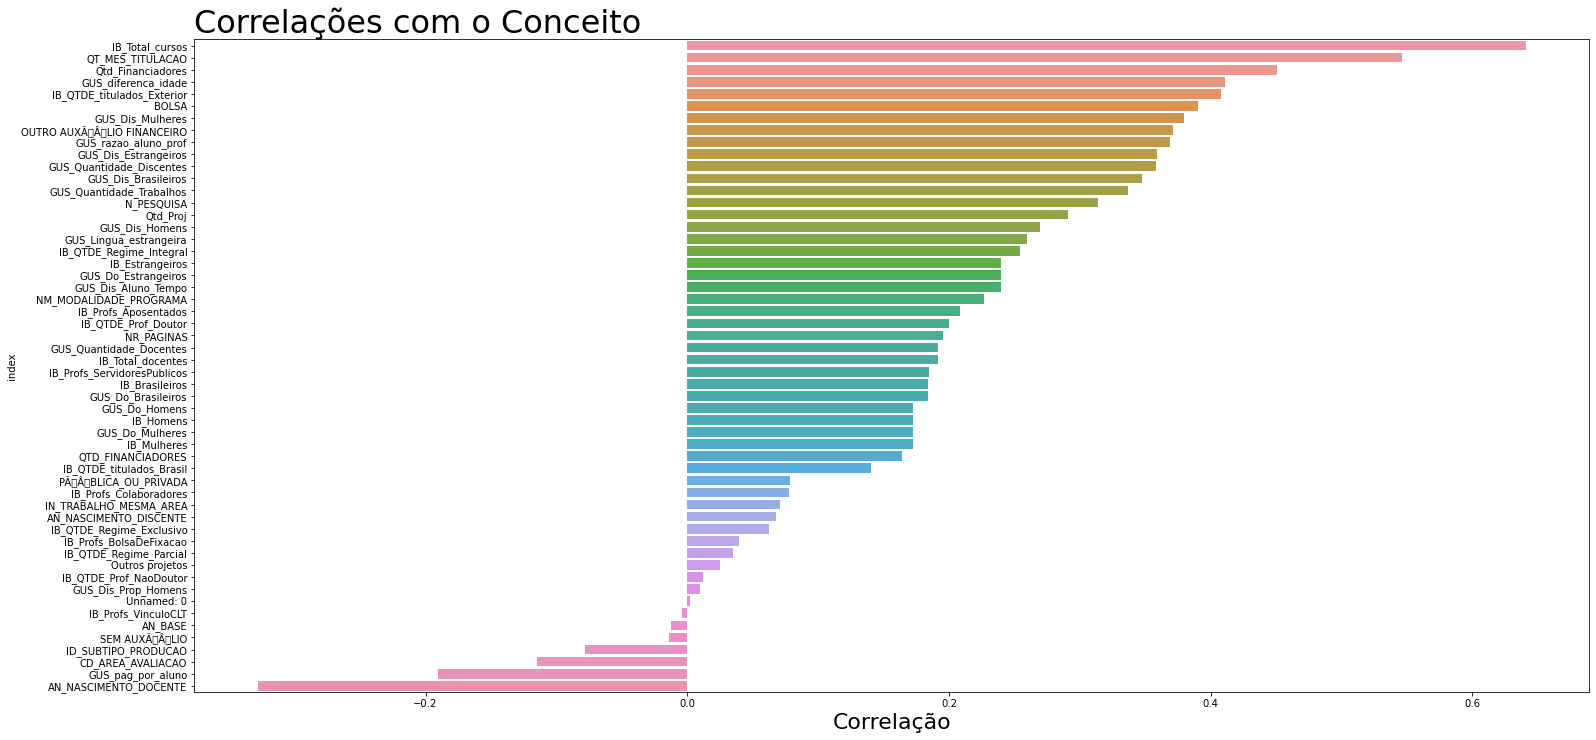

In [10]:
plt.figure(figsize = (25,12))
ax = sns.barplot(data = conceito_corr, y = 'index', x = 'CONCEITO_PROGRAMA')
plt.title("Correlações com o Conceito", fontsize = 32, loc = 'left')
plt.xlabel("Correlação", fontsize = 22)
ax = ax 

In [14]:
conceito_corr['ABS_CONCEITO_PROGRAMA'] = np.abs(conceito_corr['CONCEITO_PROGRAMA'])

In [15]:
conceito_corr = conceito_corr[conceito_corr['CONCEITO_PROGRAMA'] < 0.9].sort_values(by = 'ABS_CONCEITO_PROGRAMA', ascending = False)

In [24]:
features_com_maior_correlacao = list(conceito_corr.head(10)['index'])
features_com_maior_correlacao

['IB_Total_cursos',
 'QT_MES_TITULACAO',
 'Qtd_Financiadores',
 'GUS_diferenca_idade',
 'IB_QTDE_titulados_Exterior',
 'BOLSA',
 'GUS_Dis_Mulheres',
 'OUTRO AUXÃ\x83Â\x8dLIO FINANCEIRO',
 'GUS_razao_aluno_prof',
 'GUS_Dis_Estrangeiros']

# Clusterização

In [25]:
from sklearn import preprocessing

In [29]:
df_inicial.head() 

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,SG_ENTIDADE_ENSINO,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,SG_UF_PROGRAMA,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO AUXÃÂLIO FINANCEIRO,SEM AUXÃÂLIO,PÃÂBLICA_OU_PRIVADA,QTD_FINANCIADORES
0,10001018002P1,2013,9,3,25,10,15,25,0,16,9,0,25,0,23,2,12,8,2,3,0,2,3.0,2.0,TESE,0.0,NaN,0,21,15,10,25,0,25,1967.560000,UNIR,29,48,77,0,13.440000,3.080000,77,0.376623,1.889019,40.761905,NaN,FEDERAL,1981.000000,NORTE,RO,3,0,1,19,17.0,2.0,16,1.0,15.0,0.0,1,3
1,10001018002P1,2014,9,3,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0,2,3.0,2.0,TESE,1.0,80.0,0,13,14,8,22,0,22,1966.954545,UNIR,26,43,68,1,16.320817,3.136364,69,0.376812,2.193154,31.461538,3.636364,FEDERAL,1983.275362,NORTE,RO,3,3255,1,26,23.0,3.0,20,1.0,19.0,0.0,1,3
2,10001018002P1,2015,9,3,22,8,14,22,0,15,5,2,22,0,20,2,12,9,0,1,0,2,3.0,2.0,TESE,0.0,NaN,0,20,14,8,22,0,22,1971.136364,UNIR,33,57,88,2,13.174747,4.090909,90,0.366667,3.082192,29.200000,NaN,FEDERAL,1984.311111,NORTE,RO,3,6689,1,26,23.0,3.0,19,1.0,18.0,0.0,1,3
3,10001018002P1,2016,9,3,20,7,13,20,0,14,4,2,20,0,18,2,11,8,0,1,0,2,3.0,2.0,TESE,0.0,NaN,0,18,13,7,20,0,20,1972.200000,UNIR,28,53,80,1,14.293827,4.050000,81,0.345679,2.685083,30.166667,NaN,FEDERAL,1986.493827,NORTE,RO,3,10272,1,40,35.0,5.0,32,2.0,30.0,0.0,1,4
4,10001018002P1,2017,9,4,22,8,14,22,0,16,4,2,22,0,20,2,12,9,0,1,0,2,4.0,2.0,TESE,1.0,NaN,0,21,14,8,22,0,22,1973.727273,UNIR,43,64,106,1,13.852167,4.863636,107,0.401869,3.763819,28.428571,NaN,FEDERAL,1987.579439,NORTE,RO,4,14025,1,68,61.0,7.0,58,6.0,52.0,0.0,1,4


In [47]:
df_inicial.select_dtypes(include = 'object')

,CD_PROGRAMA_IES,NM_SUBTIPO_PRODUCAO,SG_ENTIDADE_ENSINO,CS_STATUS_JURIDICO,NM_REGIAO,SG_UF_PROGRAMA
0,10001018002P1,TESE,UNIR,FEDERAL,NORTE,RO
1,10001018002P1,TESE,UNIR,FEDERAL,NORTE,RO
2,10001018002P1,TESE,UNIR,FEDERAL,NORTE,RO
3,10001018002P1,TESE,UNIR,FEDERAL,NORTE,RO
4,10001018002P1,TESE,UNIR,FEDERAL,NORTE,RO
...,...,...,...,...,...,...
20245,53044002001P7,DISSERTAÇÃO,FIOCRUZ-EGS BRASÍLIA,FEDERAL,CENTRO-OESTE,DF
20246,53045009001P3,DISSERTAÇÃO,UTFPR,FEDERAL,SUDESTE,SE
20247,53045009001P3,DISSERTAÇÃO,UTFPR,FEDERAL,SUL,SE
20248,53045009001P3,DISSERTAÇÃO,UTFPR,FEDERAL,SUL,TO


In [64]:
df = df_inicial.select_dtypes(exclude = 'object')

In [66]:
scaler = preprocessing.MinMaxScaler()

np_df = scaler.fit_transform(df)

df = pd.DataFrame(np_df, columns= df.columns).drop(columns = ["NR_PAGINAS", "GUS_pag_por_aluno"])
df = df.dropna()

In [67]:
from sklearn.cluster import KMeans

In [68]:
km = KMeans(n_clusters=3)
km.fit(df)

KMeans(n_clusters=3)

In [70]:
df['labels'] = km.labels_

In [73]:
df.groupby('labels').mean()

,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO AUXÃÂLIO FINANCEIRO,SEM AUXÃÂLIO,PÃÂBLICA_OU_PRIVADA,QTD_FINANCIADORES
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.557781,0.550528,0.380126,0.011443,0.020407,0.012205,0.011469,0.010573,0.007442,0.018543,0.008095,0.012179,0.002397,0.014362,0.026310,0.012201,0.012132,0.027334,0.004203,0.002533,0.000000,0.380126,0.045011,0.771987,0.002842,0.017746,0.012205,0.020407,0.011469,0.010573,0.011443,0.620043,0.009474,0.017095,0.015002,0.003407,0.528861,0.125741,0.015098,0.458601,0.014701,0.230421,0.623179,0.380126,0.522476,0.711656,0.026558,0.031460,0.013281,0.026920,0.020929,0.017123,0.001946,0.797238,0.048509
1,0.805783,0.485919,0.628195,0.015333,0.025770,0.015309,0.015146,0.021555,0.007467,0.024880,0.009442,0.016572,0.000698,0.016894,0.052901,0.014052,0.015780,0.026319,0.015039,0.004201,0.999529,0.628326,0.017713,0.804997,0.018948,0.030934,0.015309,0.025770,0.015146,0.021555,0.015333,0.570944,0.017944,0.035398,0.029648,0.020218,0.616074,0.197634,0.030234,0.441137,0.022560,0.299880,0.682408,0.628195,0.738617,0.996700,0.042694,0.052746,0.012344,0.064877,0.056915,0.035268,0.000838,0.849937,0.065036
2,0.202018,0.483257,0.618400,0.015155,0.025358,0.015239,0.015000,0.020334,0.005846,0.029257,0.005495,0.016322,0.001270,0.016662,0.053654,0.011091,0.015905,0.026147,0.015463,0.002338,0.999145,0.620282,0.017174,0.892405,0.010130,0.030567,0.015239,0.025358,0.015000,0.020334,0.015155,0.504386,0.017369,0.034241,0.028659,0.020261,0.608684,0.191573,0.029246,0.442544,0.023011,0.282977,0.582489,0.618400,0.232851,1.000000,0.042715,0.052726,0.012500,0.070903,0.062550,0.038135,0.001694,0.852036,0.058962


In [79]:
#features_com_maior_correlacao.append('labels')
features_com_maior_correlacao.append('CD_CONCEITO_PROGRAMA')


In [80]:
features_com_maior_correlacao

['IB_Total_cursos',
 'QT_MES_TITULACAO',
 'Qtd_Financiadores',
 'GUS_diferenca_idade',
 'IB_QTDE_titulados_Exterior',
 'BOLSA',
 'GUS_Dis_Mulheres',
 'OUTRO AUXÃ\x83Â\x8dLIO FINANCEIRO',
 'GUS_razao_aluno_prof',
 'GUS_Dis_Estrangeiros',
 'labels',
 'CD_CONCEITO_PROGRAMA']

In [81]:
df[features_com_maior_correlacao].groupby('labels').mean()

,IB_Total_cursos,QT_MES_TITULACAO,Qtd_Financiadores,GUS_diferenca_idade,IB_QTDE_titulados_Exterior,BOLSA,GUS_Dis_Mulheres,OUTRO AUXÃÂLIO FINANCEIRO,GUS_razao_aluno_prof,GUS_Dis_Estrangeiros,CD_CONCEITO_PROGRAMA
labels,,,,,,,,,,,
0,0.000000,0.230421,0.026920,0.528861,0.026310,0.020929,0.017095,0.017123,0.125741,0.003407,0.380126
1,0.999529,0.299880,0.064877,0.616074,0.052901,0.056915,0.035398,0.035268,0.197634,0.020218,0.628195
2,0.999145,0.282977,0.070903,0.608684,0.053654,0.062550,0.034241,0.038135,0.191573,0.020261,0.618400
